In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
off_train = pd.read_csv('./data/ccf_offline_stage1_train.csv')
off_test = pd.read_csv('./data/ccf_offline_stage1_test_revised.csv')
on_train = pd.read_csv('./data/ccf_online_stage1_train.csv')

In [3]:
off_train.sample(3)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
1154197,2457418,970,NaN,NaN,0.0,NaN,20160126.0
399078,3380781,7415,NaN,NaN,8.0,NaN,20160409.0
835479,6553093,8077,6680.0,100:10,10.0,20160128.0,NaN


In [4]:
off_test.sample(3)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
6435,3482209,7229,9959,20:1,1.0,20160714
37959,5518833,760,13602,30:5,NaN,20160710
103173,2381402,8563,12996,30:5,0.0,20160722


In [5]:
on_train.sample(3)

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
6196324,15112100,44004,0,NaN,NaN,NaN,20160419.0
117279,1049540,18907,1,100101065,100:50,20160610.0,20160617.0
2268601,11559800,54310,0,NaN,NaN,NaN,20160512.0


可以看出读入的时候Date被读取成了一个数字.我们需要将其转换为时间以便后续处理

In [6]:
def convert_date(df, attr, format = '%Y%m%d.0'):
    df[attr] = pd.to_datetime(df[attr].astype(str), format = format)

In [7]:
for df in [off_train, on_train]:
    convert_date(df, 'Date')
for df in [off_train, on_train, off_test]:
    convert_date(df, 'Date_received', format = '%Y%m%d')

In [8]:
print('_________offline train_______________')
off_train.info()
print('_________offline test_______________')
off_test.info()
print('_________online train_______________')
on_train.info()

_________offline train_______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   User_id        int64         
 1   Merchant_id    int64         
 2   Coupon_id      float64       
 3   Discount_rate  object        
 4   Distance       float64       
 5   Date_received  datetime64[ns]
 6   Date           datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 93.7+ MB
_________offline test_______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113640 entries, 0 to 113639
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User_id        113640 non-null  int64         
 1   Merchant_id    113640 non-null  int64         
 2   Coupon_id      113640 non-null  int64         
 3   Discount_rate  113640 non-null  object   

由题目背景, 当优惠券为空值时无折扣,此时可以用-1填充优惠券中的空值

In [9]:
off_train['Coupon_id'].fillna(-1, inplace = True)
off_test['Coupon_id'].fillna(-1, inplace = True)
on_train['Coupon_id'].fillna(-1, inplace = True)

offline train 和 online train的数据量较大导致info()没有说明非空值的量, 下面进行查看非空值个数的操作

In [10]:
def find_null_vals(df):
    all_cnt = len(df)
    missing_ls = []
    for attr in df:
        no_null = df[attr].count()
        if no_null != all_cnt:
            out = "{} non-null in {} values - Attribute {} has {}({}%) null values".format(no_null, all_cnt, attr, all_cnt - no_null, round((all_cnt - no_null)/all_cnt * 100, 2))
            print(out)
            missing_ls.append(attr)
    return missing_ls

对于offline train:

In [11]:
off_train_null = find_null_vals(off_train)

1053282 non-null in 1754884 values - Attribute Discount_rate has 701602(39.98%) null values
1648881 non-null in 1754884 values - Attribute Distance has 106003(6.04%) null values
1053282 non-null in 1754884 values - Attribute Date_received has 701602(39.98%) null values
776984 non-null in 1754884 values - Attribute Date has 977900(55.72%) null values


对于online train

In [12]:
on_train_null = find_null_vals(on_train)

872357 non-null in 11429826 values - Attribute Discount_rate has 10557469(92.37%) null values
872357 non-null in 11429826 values - Attribute Date_received has 10557469(92.37%) null values
10773928 non-null in 11429826 values - Attribute Date has 655898(5.74%) null values


再看一下offline test

In [13]:
off_test_null = find_null_vals(off_test)

101576 non-null in 113640 values - Attribute Distance has 12064(10.62%) null values


In [14]:
on_train.describe(include = 'all', datetime_is_numeric=True)

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
count,1.142983e+07,1.142983e+07,1.142983e+07,11429826.0,872357,872357,10773928
unique,NaN,NaN,NaN,27748.0,64,NaN,NaN
top,NaN,NaN,NaN,-1.0,fixed,NaN,NaN
freq,NaN,NaN,NaN,10557469.0,131546,NaN,NaN
mean,1.074683e+07,3.436686e+04,2.348193e-01,NaN,NaN,2016-04-01 16:55:45.012189184,2016-04-06 21:42:09.714916096
min,4.000000e+00,1.000100e+04,0.000000e+00,NaN,NaN,2016-01-01 00:00:00,2016-01-01 00:00:00
25%,1.019827e+07,2.090100e+04,0.000000e+00,NaN,NaN,2016-02-28 00:00:00,2016-02-26 00:00:00
50%,1.196970e+07,3.420000e+04,0.000000e+00,NaN,NaN,2016-04-04 00:00:00,2016-04-10 00:00:00
75%,1.373506e+07,4.741500e+04,0.000000e+00,NaN,NaN,2016-05-11 00:00:00,2016-05-23 00:00:00
max,1.550000e+07,6.000000e+04,2.000000e+00,NaN,NaN,2016-06-15 00:00:00,2016-06-30 00:00:00


In [15]:
off_train.describe(include = 'all', datetime_is_numeric=True)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
count,1.754884e+06,1.754884e+06,1.754884e+06,1053282,1.648881e+06,1053282,776984
unique,NaN,NaN,NaN,45,NaN,NaN,NaN
top,NaN,NaN,NaN,30:5,NaN,NaN,NaN
freq,NaN,NaN,NaN,270712,NaN,NaN,NaN
mean,3.689255e+06,4.038808e+03,4.090205e+03,NaN,2.361636e+00,2016-03-18 21:18:23.232752384,2016-04-11 05:12:08.391832832
min,4.000000e+00,1.000000e+00,-1.000000e+00,NaN,0.000000e+00,2016-01-01 00:00:00,2016-01-01 00:00:00
25%,1.845052e+06,1.983000e+03,-1.000000e+00,NaN,0.000000e+00,2016-01-29 00:00:00,2016-03-06 00:00:00
50%,3.694446e+06,3.532000e+03,1.807000e+03,NaN,0.000000e+00,2016-03-21 00:00:00,2016-04-16 00:00:00
75%,5.528759e+06,6.329000e+03,8.105000e+03,NaN,3.000000e+00,2016-05-14 00:00:00,2016-05-23 00:00:00
max,7.361032e+06,8.856000e+03,1.404500e+04,NaN,1.000000e+01,2016-06-15 00:00:00,2016-06-30 00:00:00


In [16]:
off_test.describe(include = 'all', datetime_is_numeric=True)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
count,1.136400e+05,113640.000000,113640.000000,113640,101576.000000,113640
unique,NaN,NaN,NaN,42,NaN,NaN
top,NaN,NaN,NaN,30:5,NaN,NaN
freq,NaN,NaN,NaN,59318,NaN,NaN
mean,3.684858e+06,2962.283853,9053.810929,NaN,2.328040,2016-07-15 14:42:45.997888512
min,2.090000e+02,6.000000,3.000000,NaN,0.000000,2016-07-01 00:00:00
25%,1.844191e+06,760.000000,5023.000000,NaN,0.000000,2016-07-07 00:00:00
50%,3.683266e+06,2050.000000,9983.000000,NaN,1.000000,2016-07-16 00:00:00
75%,5.525845e+06,5138.000000,13602.000000,NaN,3.000000,2016-07-24 00:00:00
max,7.361024e+06,8856.000000,14045.000000,NaN,10.000000,2016-07-31 00:00:00


# 数据探索性分析

查看offline train中客户,商家, 优惠券ID的唯一值数量

In [17]:
def unique_num(df, attrs):
    dic = {}
    for attr in attrs:
        res = len(set(df[attr]))
        dic[attr] = res
    return dic

In [18]:
off_train_uniq = unique_num(off_train, ['User_id', 'Merchant_id', 'Coupon_id'])
print(off_train_uniq)

{'User_id': 539438, 'Merchant_id': 8415, 'Coupon_id': 9739}


online train中客户,商家, 优惠券ID的唯一值数量

In [19]:
on_train_uniq = unique_num(on_train, ['User_id', 'Merchant_id', 'Coupon_id'])
print(on_train_uniq)

{'User_id': 762858, 'Merchant_id': 7999, 'Coupon_id': 27748}


offline test中商家, 用户, 优惠券ID唯一值数量

In [20]:
off_test_uniq = unique_num(off_test, ['User_id', 'Merchant_id', 'Coupon_id'])
print(off_test_uniq)

{'User_id': 76309, 'Merchant_id': 1559, 'Coupon_id': 2050}


查看offline train与测试集中商家, 用户, 优惠券重复数量, 为了方便还是直接写一个function

In [21]:
def find_dup(df1, df2, attrs):
    dic = {}
    for attr in attrs:
        res = len(set(df1[attr]) & set(df2[attr]))
        dic[attr] = res
    return dic

In [22]:
dup_off = find_dup(off_train, off_test, ['User_id', 'Merchant_id', 'Coupon_id'])
dup_off

{'User_id': 76307, 'Merchant_id': 1558, 'Coupon_id': 1118}

看一下offline train与测试集中商家, 用户, 优惠券重复比例

In [23]:
def dup_rate(dup_dic, test_uniq_dic):
    dic = {}
    for key in dup_dic:
        dic[key] = dup_dic[key]/test_uniq_dic[key]
    return dic

In [24]:
dup_rate(dup_off, off_test_uniq)

{'User_id': 0.9999737907717308,
 'Merchant_id': 0.9993585631815266,
 'Coupon_id': 0.5453658536585366}

同理,查看online train与测试集商家,用户, 优惠券ID的重复数并计算重复比例

In [25]:
dup_on = find_dup(on_train, off_test, ['User_id', 'Merchant_id', 'Coupon_id'])
print(dup_on)

{'User_id': 43155, 'Merchant_id': 0, 'Coupon_id': 0}


In [26]:
dup_rate(dup_on, off_test_uniq)

{'User_id': 0.5655296229802513, 'Merchant_id': 0.0, 'Coupon_id': 0.0}

offline train 的商家,用户,优惠券ID与测试集重复度较大, 所以我们后续主要对offline train进行分析

查看offline train中折扣率分布

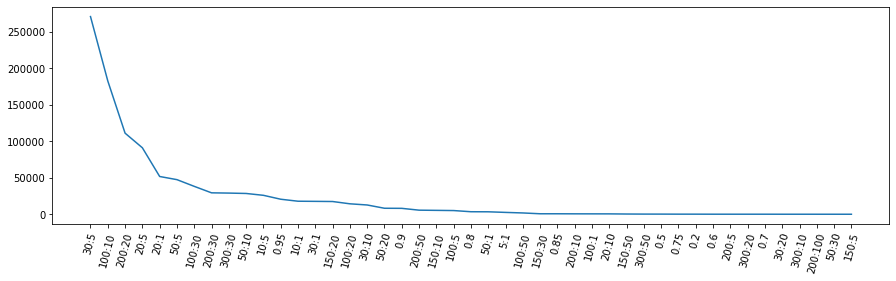

In [27]:
train_discount = off_train['Discount_rate'].value_counts()
plt.figure(figsize = [15, 4])
plt.plot(train_discount)
plt.xticks(rotation="75")
plt.show()

查看测试集中折扣率分布

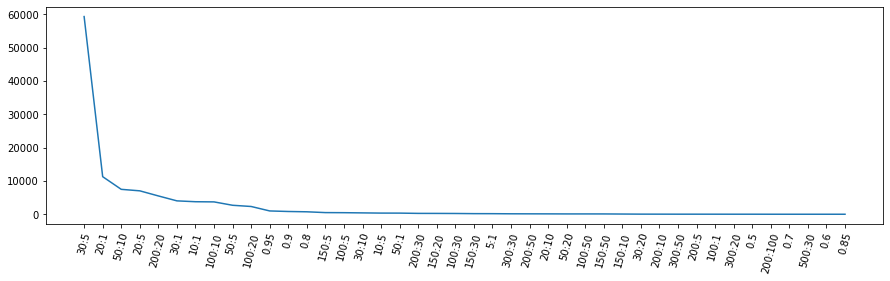

In [28]:
test_discount = off_test['Discount_rate'].value_counts()
plt.figure(figsize = [15, 4])
plt.plot(test_discount)
plt.xticks(rotation="75")
plt.show()

## 特征转换

### 折扣处理

这里对官方代码进行了大量修改.官方代码使用了四个function,这里只需要一个. 若在调用此方法时报错,请更新pandas至最新版本(早期版本不支持)

In [29]:
def get_discount_msg(s):
    """
    return: 折扣率,是否满减,满减条件,满减的值
    """
    if pd.isna(s):
        return -1, 0, -1, -1        
    s = s.split(':')
    if len(s) == 1:
        return float(s[0]), 0, -1, -1
    cond = int(s[0])
    discount = int(s[1])
    drate = cond/discount
    return drate, 1, cond, discount

### 日期处理

同样修改了官方代码.在读取时已经将Date和Date_received转换成了datetime数据格式, 所以并不需要像官方代码一样麻烦

In [30]:
def get_day_msgs(date, date_received):
    '''
    return: label(0 - 没发放优惠券, -1 - 未在15日内使用优惠券, 1 - 15日内使用优惠券), day_gap(发放与使用日期间隔)
    '''
    if pd.isna(date): #空值处理
        return 0, -1
    if pd.isna(date_received):
        return -1, -1
    gap = date - date_received
    gap = int(gap.days)
    if gap <= 15:
        return 1, gap
    return -1, -1


### 将处理后的信息添加到DataFrame

In [31]:
def add_feature(df):
    df[['discount_rate', 'if_fd', 'full_value', 'reduction_value']] = df.apply(lambda x: get_discount_msg(x['Discount_rate']), axis = 1, result_type="expand")
    if 'Date' in df.columns: # 仅对train添加label和gap特征
        df[['label', 'gap']] = df.apply(lambda x: get_day_msgs(x['Date'], x['Date_received']), axis = 1, result_type="expand")

In [32]:
add_feature(off_train)
add_feature(off_test)

因之前运行时间过长,为了方便后续的训练,将中间文件(特征扩展后的off_train和off_test)临时存储)

In [35]:
import os
if not os.path.exists('./tmps'):
    os.mkdir('./tmps')

In [36]:
off_train.to_pickle('./tmps/off_train')
off_test.to_pickle('./tmps/off_test')